In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [99]:
# Load ASD dataset
df = pd.read_csv('Autism.csv') 

In [100]:
df.shape

(704, 21)

In [101]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [102]:
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [103]:
# Replace '?' with NaN
df['age'] = df['age'].replace('?', np.nan)


# Drop rows with NaN in 'age'
df = df.dropna(subset=['age'])

In [104]:
df.dtypes

A1_Score            int64
A2_Score            int64
A3_Score            int64
A4_Score            int64
A5_Score            int64
A6_Score            int64
A7_Score            int64
A8_Score            int64
A9_Score            int64
A10_Score           int64
age                object
gender             object
ethnicity          object
jundice            object
austim             object
contry_of_res      object
used_app_before    object
result              int64
age_desc           object
relation           object
Class/ASD          object
dtype: object

In [105]:
df.drop(columns=['austim', 'ethnicity', 'contry_of_res', 'relation'], inplace=True)


In [106]:
# Select object columns
object_columns = df.select_dtypes(include=['object']).columns

# Print unique values for each object column
for col in object_columns:
    print(f"Unique values in '{col}': {df[col].unique()}\n")

Unique values in 'age': ['26' '24' '27' '35' '40' '36' '17' '64' '29' '33' '18' '31' '30' '34'
 '38' '42' '43' '48' '37' '55' '50' '53' '20' '28' '21' '383' '47' '32'
 '44' '19' '58' '45' '22' '39' '25' '23' '54' '60' '41' '46' '56' '61'
 '59' '52' '49' '51']

Unique values in 'gender': ['f' 'm']

Unique values in 'jundice': ['no' 'yes']

Unique values in 'used_app_before': ['no' 'yes']

Unique values in 'age_desc': ["'18 and more'"]

Unique values in 'Class/ASD': ['NO' 'YES']



In [107]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}  # Dictionary to store encoders for future use

categorical_cols = ['age_desc']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string before encoding
    label_encoders[col] = le  # Store the encoder

df['gender'] = df['gender'].map({'m': 1, 'f': 0})


# Binary mapping for 'jundice', 'austim', and 'Class/ASD'
binary_cols = ['jundice', 'Class/ASD', 'used_app_before']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0, 'YES': 1, 'NO': 0})


In [108]:
df.dtypes

A1_Score            int64
A2_Score            int64
A3_Score            int64
A4_Score            int64
A5_Score            int64
A6_Score            int64
A7_Score            int64
A8_Score            int64
A9_Score            int64
A10_Score           int64
age                object
gender              int64
jundice             int64
used_app_before     int64
result              int64
age_desc            int32
Class/ASD           int64
dtype: object

In [109]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'jundice', 'used_app_before', 'result', 'age_desc', 'Class/ASD'],
      dtype='object')

In [110]:
df.shape


(702, 17)

In [124]:
df.to_csv("scaled.csv")

In [111]:
X = df.drop(columns=['Class/ASD'])  # Dropping the target variable
y = df['Class/ASD']  # Storing the target separately


In [112]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [128]:
X_train.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'jundice', 'used_app_before', 'result', 'age_desc'],
      dtype='object')

In [113]:
!pip install catboost

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [115]:

# Train RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate model
y_pred_rf = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print("RF Model Accuracy:", rf_acc)


RF Model Accuracy: 1.0


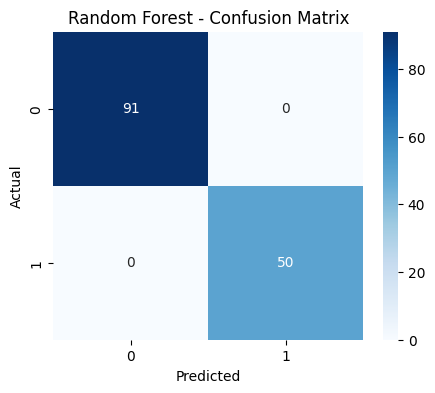

In [116]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [117]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)
print("DT Model Accuracy:", dt_acc)

DT Model Accuracy: 1.0


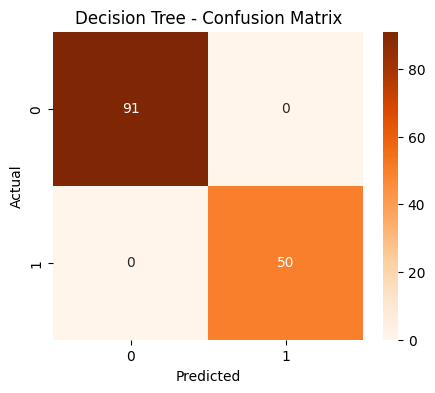

In [118]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Oranges")
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [119]:
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)
cat_acc = accuracy_score(y_test, y_pred_cat)
print("Catboost accuracy:", cat_acc)

Catboost accuracy: 1.0


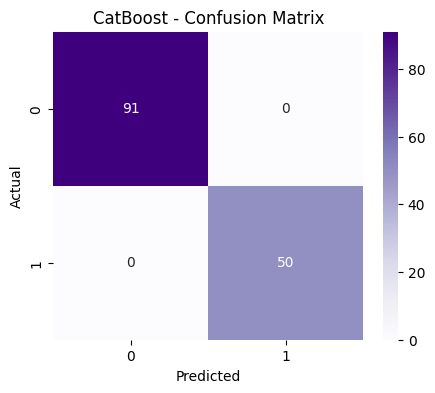

In [120]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_cat), annot=True, fmt="d", cmap="Purples")
plt.title("CatBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17192\1976518371.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_scores, palette="viridis")


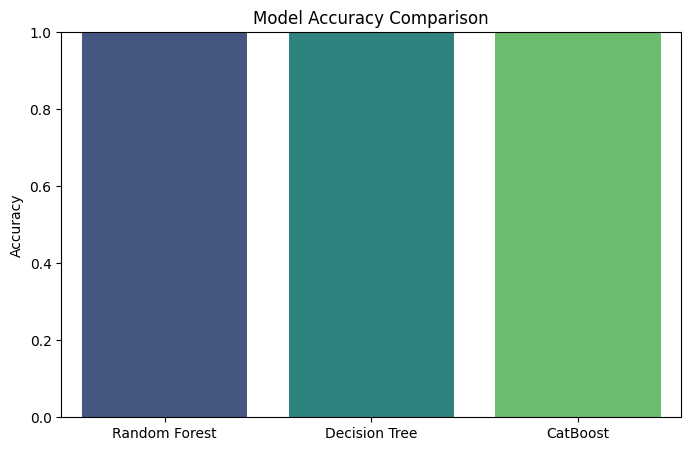

In [121]:
models = ['Random Forest', 'Decision Tree',  'CatBoost']
accuracy_scores = [rf_acc, dt_acc, cat_acc]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracy_scores, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17192\2905514159.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = X.corr()


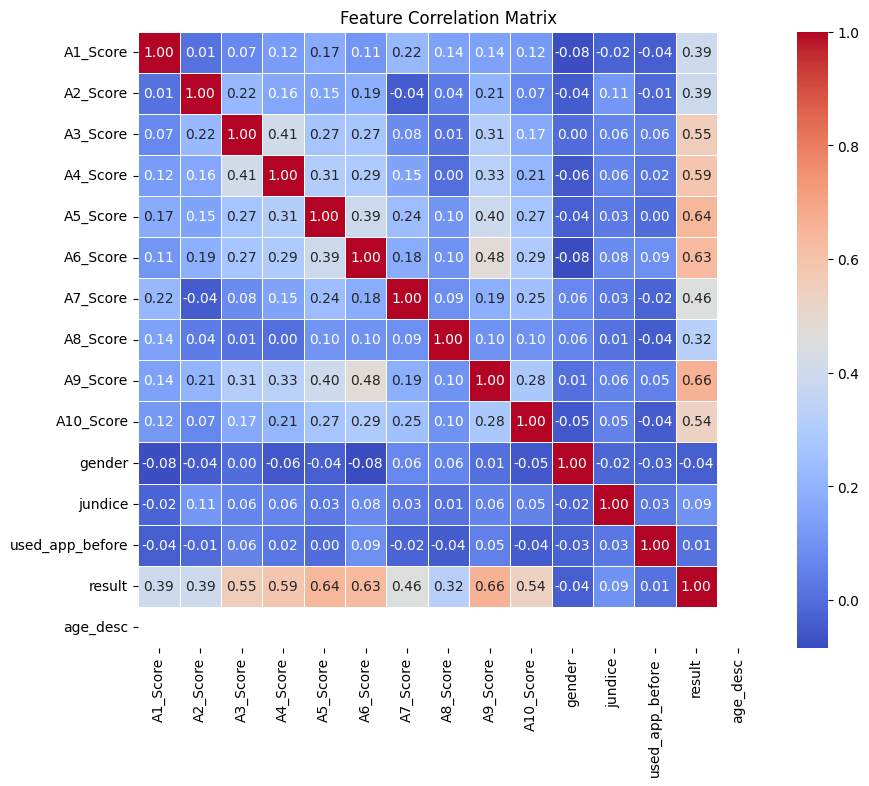

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


In [123]:
import joblib
joblib.dump(dt_model, "decision_tree_model.pkl")
print("Decision Tree Model saved successfully! ✅")


Decision Tree Model saved successfully! ✅


In [ ]:
import joblib
# Load the trained Decision Tree model
loaded_model = joblib.load('decision_tree_model.pkl')

# Example: Manually enter feature values
# Ensure these match the number and order of features in training
custom_input = np.array([[1,1,0,1,1,0,1,1,1,1,27,1,1,0,8,0]])  # Replace with actual values

# Predict probability and label
pred_prob = loaded_model.predict_proba(custom_input)[0][1]
pred_label = loaded_model.predict(custom_input)[0]

print(f"Prediction Probability: {pred_prob:.4f}")
print(f"Predicted Label: {'Autistic' if pred_label == 1 else 'Non-Autistic'}")


Prediction Probability: 1.0000
Predicted Label: Autistic


c:\Users\ADMIN\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
